# Supervised learning

## Def.:
- Given the **predictor variable** or *feature, independent variable*, like measurements
- to build a model which is able to predict the **target variable** or *dependent variable, response variable*

## Different types of supervised learning
- classification: target variable consist of categories
- regression: target is a continuously varying variable

## Goal
- to learn from data for which the right output is known, so that we can make predictions on new data for which we don't know the output



# Exploratory Data Analysis (EDA)

In [6]:
from sklearn import datasets

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  

plt.style.use('ggplot')

# load build-in dataset in sklearn
iris = datasets.load_iris()

print(type(iris))
# the type of our dataset is bunch, which is similar to 
# a dictionary in that it contains key-value-pairs

print(iris.keys())


<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [10]:
print(f'type of features: {type(iris.data)}' )
print(f'type of target: {type(iris.target)}')

type of features: <class 'numpy.ndarray'>
type of target: <class 'numpy.ndarray'>


In [13]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [14]:
iris.data.shape
# feature array has 150 rows and 4 columns --> 150 samples and 4 features

(150, 4)

In [19]:
print(f'feature names: {iris.feature_names}')
print(f'target names: {iris.target_names}')
print(f'target encoded in : {np.unique(iris.target)}')

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']
target encoded in : [0 1 2]


In [21]:
X = iris.data

y = iris.target

# use columns=iris.feature_names to set the column names as feature_names, rather than 0, 1, 2, 3
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## Visual EDA
- on the diagonal: histograms of features
- off-diagonal figures: scatter plots of the column feature versus row feature colored by the target variable

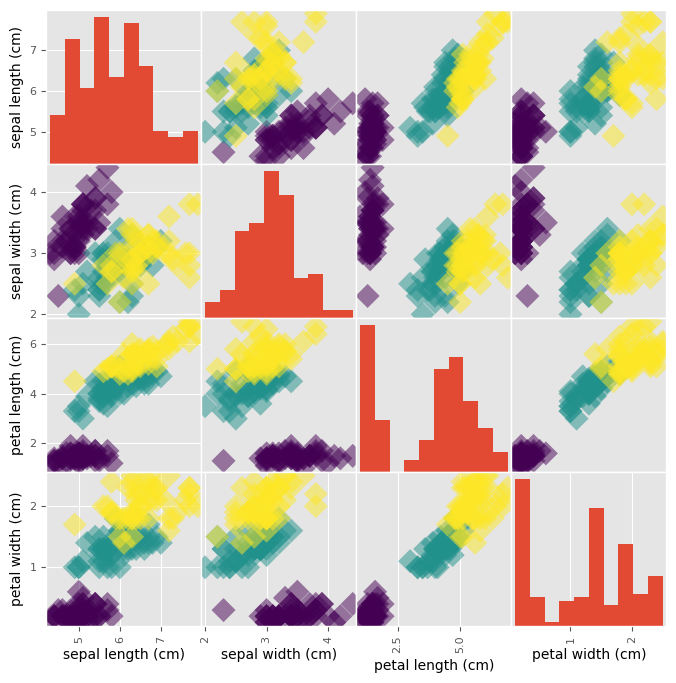

In [22]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize=[8,8], s=150, marker='D')

# 1. Classification algorithm: KNN
All *machine learning models* in `scikit-learn` are implemented as **python classes**. These classes serve two purposes: they **implement** the algorithms for learning a model, and predicting, while also **storing** all the information that is learned from the data. 


Training a model on the data is also called **fitting** the model to the data. In scikit-learn, we use the `fit` method to do this. Similarly, the `predict` method is what we use to predict the label of an, unlabeled data point.


The scikit-learn API requires firstly that you have the data as a **NumPy array** or **pandas DataFrame**. It also requires that the ***features take on continuous values***, such as the price of a house, as opposed to categories, such as 'male' or 'female'. It also requires that there are **no missing values** in the data. 

In [23]:
# using sklearn to fit a classifier: knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6) #instantiation of the class
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [25]:
print(iris['data'].shape) # -> 150 observations of 4 features
print(iris.target.shape) # --> target needs to be a single column with the same number of observations as the feature data

(150, 4)
(150,)


In [27]:
# .csv does not provide us column names, so we need to add them in the dataframe manuely
col_names = ['party','infants','water','budget','physician','salvador','religious','satellite','aid','missile','immigration','synfuels','education','superfund','crime','duty_free_exports','eaa_rsa']

# import Congressional voting records dataset
df_voting = pd.read_csv('house-votes-84.csv', names=col_names)

print(df_voting.head())

        party infants water budget physician salvador religious satellite aid  \
0  republican       n     y      n         y        y         y         n   n   
1  republican       n     y      n         y        y         y         n   n   
2    democrat       ?     y      y         ?        y         y         n   n   
3    democrat       n     y      y         n        ?         y         n   n   
4    democrat       y     y      y         n        y         y         n   n   

  missile immigration synfuels education superfund crime duty_free_exports  \
0       n           y        ?         y         y     y                 n   
1       n           n        n         y         y     y                 n   
2       n           n        y         n         y     y                 n   
3       n           n        y         n         y     n                 n   
4       n           n        y         ?         y     y                 y   

  eaa_rsa  
0       y  
1       ?  
2       

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# ! it's important to make sure that your data is prepared appropriately before fitting the model. 
# ! Here are a few potential issues or improvements to consider:
# * 1. no missing values in the dataset
# * 2. features (X) don't contain categorical values --> numerical values
# * 3. features in the dataset are on a similar scale, because KNN is sensitive to the scale of features

# TODO: Data preprocessing
y = df_voting['party'].values
X = pd.get_dummies(df_voting.drop('party', axis=1), drop_first=True).values
# axis : {0 or 'index', 1 or 'columns'}, default 0
# Whether to drop labels from the index (0 or 'index') or columns (1 or 'columns').

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [52]:
print(X)

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 0 1]
 [1 0 1 ... 0 0 1]
 [1 0 0 ... 0 1 0]]


In [53]:
# * using training data as test data
y_pred_on_training = knn.predict(X)
print(y_pred_on_training)
print(y_pred_on_training.shape)

['republican' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'republican' 'democrat' 'republican'
 'republican' 'democrat' 'democrat' 'republican' 'republican' 'democrat'
 'democrat' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'democrat'
 'republican' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'republican' 'democrat'
 'republican' 'democrat' 'republican' 'republican' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'republican' 'repub

In [57]:
# try to get a random sample: X_new with only 1 observation
n_features = len(col_names) - 1
print(n_features)

import random

random.seed(42)
X_new = []
for i in range(10):
    sample = [random.randint(0, 1) for _ in range(32)] # ? Why 32 not 16? Because we used pd.get_dummies and removed the first column
    X_new.append(sample)
    

print(len(X_new))  # * now we got 10 random lists and each of them has 16*2 elements

16
10


In [58]:
# TODO: use the new sample to predict
new_prediction = knn.predict(X_new)
print('New prediction: {}'.format(new_prediction))

New prediction: ['democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat']


In [59]:
X.shape

(435, 32)

# Measuring model performance
